Vamos a realizar una clasterización siguiendo una serie de pasos:
1.• Aprendizaje No-Supervisado en Python
2.• Ingeniería de variables (Feature engineering)
3.• Centroid-based Clustering (K-Means , Mean-Shift & Mini-Batch K-Means)
4.• Density-based clustering (DBSCAN, OPTICS)
5.• Distribution-based clustering (GMM)
6.• Hierarchical clustering (Agglomerative Clustering)

Vamos a empezar sacando todos los datos de un valor significativo y vamos a realizarle una limpieza 
y una Feature engineering, que viene a ser la transformacion de los datos a la variable que le corresponda,
por ejemplo, una fecha habria que pasarla a "datetime".
Los datos ya limpios los tenemos en el siguiente csv

In [26]:
#Librerias necesarias
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans


In [2]:
csv_file = 'CSVS STATS/todas_stats.csv'  

# Leer el archivo CSV en un DataFrame
estadisticas = pd.read_csv(csv_file)

# Pasar a data frame
df = pd.DataFrame(estadisticas)

df.head()

,equipo,victorias_esta_temp,empates_esta_temp,derrotas_esta_temp,porcentaje_victorias_esta_temp,porcentaje_empates_esta_temp,porcentaje_derrotas_esta_temp,victorias_ult10_temp,empates_ult10_temp,derrotas_ult10_temp,...,Goles Marcados Local_ult10_temp,Goles Marcados Visitante_ult10_temp,Goles Recibidos Local_ult10_temp,Goles Recibidos Visitante_ult10_temp,Golesxpartido Local_ult10_temp,Golesxpartido Visitante_ult10_temp,Golesxpartido Recibidos Local_ult10_temp,Golesxpartido Recibidos Visitante_ult10_temp,titulos_UCL_ganados,titulos_UCL_ult10_temp
0,Copenhague,2.0,2.0,2.0,33.3,33.3,33.3,2.0,2.0,2.0,...,6.0,2.0,5.0,3.0,2.0,0.7,1.7,1.0,0,0
1,Leipzig,4.0,0.0,2.0,66.7,0.0,33.3,22.0,5.0,19.0,...,44.0,37.0,37.0,48.0,1.8,1.7,1.5,2.2,0,0
2,PSG,2.0,2.0,2.0,33.3,33.3,33.3,30.0,8.0,16.0,...,65.0,56.0,20.0,40.0,2.4,2.1,0.7,1.5,0,0
3,Lazio,3.0,1.0,2.0,50.0,16.7,33.3,5.0,5.0,4.0,...,13.0,7.0,9.0,11.0,1.9,1.0,1.3,1.6,0,0
4,PSV,2.0,3.0,1.0,33.3,50.0,16.7,2.0,3.0,1.0,...,4.0,4.0,3.0,7.0,1.3,1.3,1.0,2.3,0,0


Ahora vamos a realizar una clusterizacion haciendo uso de un Aprendizaje No-Supervisado

In [6]:
#Vamos a añadir una columna con la cantidad de partidos jugados los ultimos 10 años

df['partidos_ult10_temp'] = df['victorias_ult10_temp'] + df['empates_ult10_temp'] + df['derrotas_ult10_temp']

df.head()

,equipo,victorias_esta_temp,empates_esta_temp,derrotas_esta_temp,porcentaje_victorias_esta_temp,porcentaje_empates_esta_temp,porcentaje_derrotas_esta_temp,victorias_ult10_temp,empates_ult10_temp,derrotas_ult10_temp,...,Goles Marcados Visitante_ult10_temp,Goles Recibidos Local_ult10_temp,Goles Recibidos Visitante_ult10_temp,Golesxpartido Local_ult10_temp,Golesxpartido Visitante_ult10_temp,Golesxpartido Recibidos Local_ult10_temp,Golesxpartido Recibidos Visitante_ult10_temp,titulos_UCL_ganados,titulos_UCL_ult10_temp,partidos_ult10_temp
0,Copenhague,2.0,2.0,2.0,33.3,33.3,33.3,2.0,2.0,2.0,...,2.0,5.0,3.0,2.0,0.7,1.7,1.0,0,0,6.0
1,Leipzig,4.0,0.0,2.0,66.7,0.0,33.3,22.0,5.0,19.0,...,37.0,37.0,48.0,1.8,1.7,1.5,2.2,0,0,46.0
2,PSG,2.0,2.0,2.0,33.3,33.3,33.3,30.0,8.0,16.0,...,56.0,20.0,40.0,2.4,2.1,0.7,1.5,0,0,54.0
3,Lazio,3.0,1.0,2.0,50.0,16.7,33.3,5.0,5.0,4.0,...,7.0,9.0,11.0,1.9,1.0,1.3,1.6,0,0,14.0
4,PSV,2.0,3.0,1.0,33.3,50.0,16.7,2.0,3.0,1.0,...,4.0,3.0,7.0,1.3,1.3,1.0,2.3,0,0,6.0


Vamos a realizar un clustering por K-Means realizando previamente una normalizacion de las variables que he elegido

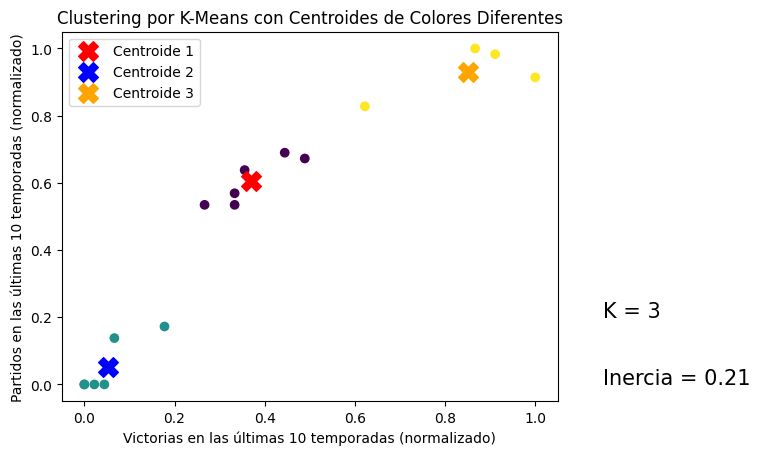

In [21]:
# Seleccionar las columnas relevantes
columnas_para_normalizar = ['victorias_ult10_temp', 'partidos_ult10_temp']

# Crear un objeto MinMaxScaler para evitar sesgos
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
df[columnas_para_normalizar] = scaler.fit_transform(df[columnas_para_normalizar])

# Definir el número de clústeres
num_clusters = 3

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['etiqueta_clusters'] = kmeans.fit_predict(df[columnas_para_normalizar])

# Colores para los centroides
colores = ["red", "blue", "orange"]

# Visualizar los resultados con colores diferentes para cada clúster y cada centroide
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['etiqueta_clusters'], cmap='viridis')
for i, color in enumerate(colores):
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='X', s=200, color=color, label=f'Centroide {i+1}')

plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Clustering por K-Means con Centroides de Colores Diferentes')
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=15)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=15)
plt.legend()
plt.show()

Como podemos observar, cada punto es un equipo y tiene un centroide que se adapta mas a ese equipo que el resto de centroides,
la inercia muestra que tan pegados al centroide estan los datos, si aumentamos k, es decir el numero de centroides, esa inercia disminuira y por el contrario, si disminuimos k, la inercia aumentara

Vamos a realizar un Clustering de Mean-Shift que a diferencia de K-means, es un algoritmo de agrupamiento basado en densidad que encuentra los modos locales de densidad en los datos y agrupa los puntos alrededor de esos modos.
Comienza con ventanas (kernel) centradas en cada punto de datos y desplaza iterativamente estas ventanas hacia las regiones de mayor densidad hasta que convergen hacia los modos locales de densidad.
No requiere especificar el número de clusters de antemano; lo determina automáticamente en función de la densidad de los datos y es menos sensible a la inicialización debido a su enfoque basado en densidad.


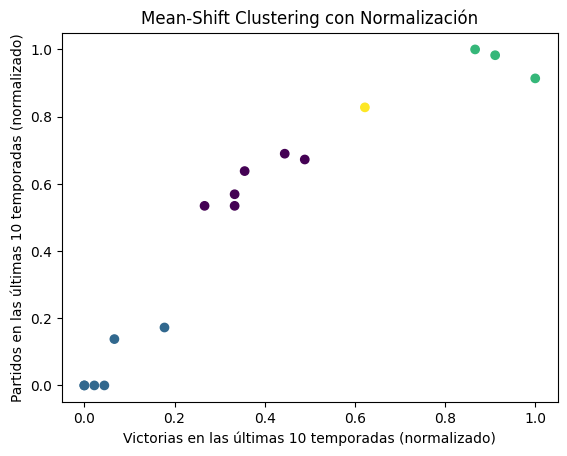

In [25]:
# Aplicar Mean-Shift
meanshift = MeanShift()
df['etiqueta_clusters'] = meanshift.fit_predict(df[columnas_para_normalizar])


# Visualizar los resultados con colores diferentes para cada clúster
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['etiqueta_clusters'], cmap='viridis')
plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Mean-Shift Clustering con Normalización')
plt.show()

Como podemos observar, este algoritmo ha utilizado 4 Centroides ya que ha visto que es la cantidad mas apropiada en funcion de la densidad de los datos

Ahora vamos a llevar a cabo el algoritmo Mini-Batch K-Means, el cual es una variante del K-Means que utiliza muestras aleatorias (mini-batches) de los datos en lugar de la totalidad del conjunto de datos para actualizar los centroides, lo que lo hace más eficiente para conjuntos de datos grandes.
Utiliza muestras aleatorias (mini-batches) de datos para actualizar los centroides de manera más eficiente que el K-Means tradicional.
Requiere indicarle el numero de K-Means, es menos sensible a la inicialización en comparación con K-Means tradicional debido a la aleatorización de las mini-batches y es mas optimo para una gran cantidad de datos

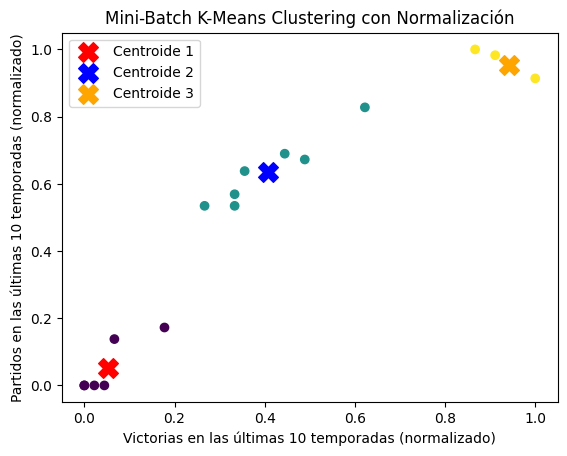

In [27]:
# Definir el número de clústeres
num_clusters = 3 

# Aplicar Mini-Batch K-Means
minibatch_kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42)
df['etiqueta_clusters'] = minibatch_kmeans.fit_predict(df[columnas_para_normalizar])

# Colores para los centroides
colores = ["red", "blue", "orange"]

# Visualizar los resultados con colores diferentes para cada clúster y cada centroide
plt.scatter(df['victorias_ult10_temp'], df['partidos_ult10_temp'], c=df['etiqueta_clusters'], cmap='viridis')
for i, color in enumerate(colores):
    plt.scatter(minibatch_kmeans.cluster_centers_[i, 0], minibatch_kmeans.cluster_centers_[i, 1], marker='X', s=200, color=color, label=f'Centroide {i+1}')

plt.xlabel('Victorias en las últimas 10 temporadas (normalizado)')
plt.ylabel('Partidos en las últimas 10 temporadas (normalizado)')
plt.title('Mini-Batch K-Means Clustering con Normalización')
plt.legend()
plt.show()

Es muy parecido al algoritmo K-Means pero como podemos observar hay un dato que ha asociado a otro centroide, esto se debe a que ha situado los centroides de una manera mas eficiente